# Import Libraries and Data

In [41]:
import os
import glob

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

import tensorflow as tf
from tensorflow.keras import Sequential, optimizers, losses, layers

%matplotlib inline

Data Courtesy of https://www.kaggle.com/code/gitanjali1425/predicting-car-battery-heating-data/input

In [2]:
overview = pd.read_excel("archive/Overview.xlsx")
overview.head()

,Trip,Date,Route/Area,Weather,Battery Temperature (Start) [°C],Battery Temperature (End),Battery State of Charge (Start),Battery State of Charge (End),Unnamed: 8,Ambient Temperature (Start) [°C],Target Cabin Temperature,Distance [km],Duration [min],Unnamed: 13,Fan,Note
0,TripA01,2019-06-25_13-21-14,Munich East,sunny,21.0,22.0,0.863,0.803,0.060,25.5,23.0,7.427690,16.820000,NaN,"Automatic, Level 1",NaN
1,TripA02,2019-06-25_14-05-31,Munich East,sunny,23.0,26.0,0.803,0.673,0.130,32.0,23.0,23.509709,23.550000,NaN,"Automatic, Level 1",Target Cabin Temperature changed
2,TripA03,2019-06-28_10-02-15,Munich East,sunny,24.0,25.0,0.835,0.751,0.084,21.5,27.0,12.820846,11.180000,NaN,"Automatic, Level 1",Target Cabin Temperature changed
3,TripA04,2019-06-28_10-13-30,Munich East,sunny,25.0,27.0,0.751,0.667,0.084,24.0,22.0,10.727491,6.870000,NaN,"Automatic, Level 1",NaN
4,TripA05,2019-06-28_10-20-26,Munich East,sunny,27.0,27.0,0.667,0.602,0.065,24.5,24.0,12.393223,22.776667,NaN,"Automatic, Level 1",NaN


In [3]:
# Import Trip Data Set
for dirname, _, filenames in os.walk('archive/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

archive/Overview.xlsx
archive/readin.m
archive/TripA01.csv
archive/TripA02.csv
archive/TripA03.csv
archive/TripA04.csv
archive/TripA05.csv
archive/TripA06.csv
archive/TripA07.csv
archive/TripA08.csv
archive/TripA09.csv
archive/TripA10.csv
archive/TripA11.csv
archive/TripA12.csv
archive/TripA13.csv
archive/TripA14.csv
archive/TripA15.csv
archive/TripA16.csv
archive/TripA17.csv
archive/TripA18.csv
archive/TripA19.csv
archive/TripA20.csv
archive/TripA21.csv
archive/TripA22.csv
archive/TripA23.csv
archive/TripA24.csv
archive/TripA25.csv
archive/TripA26.csv
archive/TripA27.csv
archive/TripA28.csv
archive/TripA29.csv
archive/TripA30.csv
archive/TripA31.csv
archive/TripA32.csv
archive/TripB01.csv
archive/TripB02.csv
archive/TripB03.csv
archive/TripB04.csv
archive/TripB05.csv
archive/TripB06.csv
archive/TripB07.csv
archive/TripB08.csv
archive/TripB09.csv
archive/TripB10.csv
archive/TripB11.csv
archive/TripB12.csv
archive/TripB13.csv
archive/TripB14.csv
archive/TripB15.csv
archive/TripB16.csv
a

In [4]:
# Reading a single file to see what the data provides
df = pd.read_csv("archive/TripA01.csv", sep=";", encoding="unicode_escape")
df.head()

,Time [s],Velocity [km/h],Elevation [m],Throttle [%],Motor Torque [Nm],Longitudinal Acceleration [m/s^2],Regenerative Braking Signal,Battery Voltage [V],Battery Current [A],Battery Temperature [°C],...,AirCon Power [kW],Heater Signal,Heater Voltage [V],Heater Current [A],Ambient Temperature [°C],Coolant Temperature Heatercore [°C],Requested Coolant Temperature [°C],Coolant Temperature Inlet [°C],Heat Exchanger Temperature [°C],Cabin Temperature Sensor [°C]
0,0.0,0.0,574.0,0.0,0.0,-0.03,0.0,391.4,-2.20,21.0,...,0.4,1,0,0,25.5,0,0,0,30.5,24.5
1,0.1,0.0,574.0,0.0,0.0,0.00,0.0,391.4,-2.21,21.0,...,0.4,1,0,0,25.5,0,0,0,30.5,24.5
2,0.2,0.0,574.0,0.0,0.0,-0.01,0.0,391.4,-2.26,21.0,...,0.4,1,0,0,25.5,0,0,0,30.5,24.5
3,0.3,0.0,574.0,0.0,0.0,-0.03,0.0,391.4,-2.30,21.0,...,0.4,1,0,0,25.5,0,0,0,30.5,24.5
4,0.4,0.0,574.0,0.0,0.0,-0.03,0.0,391.4,-2.30,21.0,...,0.4,1,0,0,25.5,0,0,0,30.5,24.5


In [5]:
def combine_csv():
    df_main = pd.DataFrame()
    for filename in glob.glob('archive/'+'*.csv'):
        df_trip = pd.read_csv(filename, sep=';', encoding="unicode_escape")
        df_main = pd.concat([df_main, df_trip])

    df_main.to_csv('All_Trips.csv', index=False)
    return df_main

# combine_csv()

,Time [s],Velocity [km/h],Elevation [m],Throttle [%],Motor Torque [Nm],Longitudinal Acceleration [m/s^2],Regenerative Braking Signal,Battery Voltage [V],Battery Current [A],Battery Temperature [°C],...,Temperature Footweel Co-Driver [°C],Temperature Feetvent Co-Driver [°C],Temperature Feetvent Driver [°C],Temperature Head Co-Driver [°C],Temperature Head Driver [°C],Temperature Vent right [°C],Temperature Vent central right [°C],Temperature Vent central left [°C],Temperature Vent right [°C],Velocity [km/h]]]
0,0.0,0.0,574.0,0.0,0.0,-0.03,0.0,391.40,-2.20,21.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.1,0.0,574.0,0.0,0.0,0.00,0.0,391.40,-2.21,21.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.2,0.0,574.0,0.0,0.0,-0.01,0.0,391.40,-2.26,21.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.3,0.0,574.0,0.0,0.0,-0.03,0.0,391.40,-2.30,21.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.4,0.0,574.0,0.0,0.0,-0.03,0.0,391.40,-2.30,21.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16424,1642.4,NaN,476.0,0.0,2.5,-0.04,0.0,367.15,-4.00,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
16425,1642.5,NaN,476.0,0.0,2.5,-0.04,0.0,367.20,-4.20,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
16426,1642.6,NaN,476.0,0.0,2.5,-0.04,0.0,367.15,-4.05,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
16427,1642.7,NaN,476.0,0.0,2.5,-0.04,0.0,367.10,-3.90,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [6]:
All_trips = pd.read_csv("All_Trips.csv")
All_trips

,Time [s],Velocity [km/h],Elevation [m],Throttle [%],Motor Torque [Nm],Longitudinal Acceleration [m/s^2],Regenerative Braking Signal,Battery Voltage [V],Battery Current [A],Battery Temperature [°C],...,Temperature Footweel Co-Driver [°C],Temperature Feetvent Co-Driver [°C],Temperature Feetvent Driver [°C],Temperature Head Co-Driver [°C],Temperature Head Driver [°C],Temperature Vent right [°C],Temperature Vent central right [°C],Temperature Vent central left [°C],Temperature Vent right [°C],Velocity [km/h]]]
0,0.0,0.0,574.0,0.0,0.0,-0.03,0.0,391.40,-2.20,21.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.1,0.0,574.0,0.0,0.0,0.00,0.0,391.40,-2.21,21.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.2,0.0,574.0,0.0,0.0,-0.01,0.0,391.40,-2.26,21.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.3,0.0,574.0,0.0,0.0,-0.03,0.0,391.40,-2.30,21.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.4,0.0,574.0,0.0,0.0,-0.03,0.0,391.40,-2.30,21.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1094788,1642.4,NaN,476.0,0.0,2.5,-0.04,0.0,367.15,-4.00,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1094789,1642.5,NaN,476.0,0.0,2.5,-0.04,0.0,367.20,-4.20,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1094790,1642.6,NaN,476.0,0.0,2.5,-0.04,0.0,367.15,-4.05,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1094791,1642.7,NaN,476.0,0.0,2.5,-0.04,0.0,367.10,-3.90,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


# Exploratory Data Analysis

In [7]:
All_trips.columns

Index(['Time [s]', 'Velocity [km/h]', 'Elevation [m]', 'Throttle [%]',
       'Motor Torque [Nm]', 'Longitudinal Acceleration [m/s^2]',
       'Regenerative Braking Signal ', 'Battery Voltage [V]',
       'Battery Current [A]', 'Battery Temperature [°C]',
       'max. Battery Temperature [°C]', 'SoC [%]', 'displayed SoC [%]',
       'min. SoC [%]', 'max. SoC [%)', 'Heating Power CAN [kW]',
       'Heating Power LIN [W]', 'Requested Heating Power [W]',
       'AirCon Power [kW]', 'Heater Signal', 'Heater Voltage [V]',
       'Heater Current [A]', 'Ambient Temperature [°C]',
       'Coolant Temperature Heatercore [°C]',
       'Requested Coolant Temperature [°C]', 'Coolant Temperature Inlet [°C]',
       'Heat Exchanger Temperature [°C]', 'Cabin Temperature Sensor [°C]',
       'Unnamed: 23', 'Ambient Temperature Sensor [°C]',
       'Coolant Volume Flow +500 [l/h]',
       'Temperature Coolant Heater Inlet [°C]',
       'Temperature Coolant Heater Outlet [°C]',
       'Temperature Heat 

In [8]:
overview.shape

(72, 16)

In [9]:
df.shape

(10090, 28)

In [10]:
overview.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 16 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Trip                              70 non-null     object 
 1   Date                              70 non-null     object 
 2   Route/Area                        70 non-null     object 
 3   Weather                           70 non-null     object 
 4   Battery Temperature (Start) [°C]  70 non-null     float64
 5   Battery Temperature (End)         70 non-null     float64
 6   Battery State of Charge (Start)   70 non-null     float64
 7   Battery State of Charge (End)     70 non-null     float64
 8   Unnamed: 8                        70 non-null     float64
 9   Ambient Temperature (Start) [°C]  70 non-null     float64
 10  Target Cabin Temperature          70 non-null     float64
 11  Distance [km]                     70 non-null     float64
 12  Duration [

In [11]:
# Column 8 refers to the change in battery from start to finish. We will rename to Delta Battery
overview.rename(columns={"Unnamed: 8": "Delta Battery"}, inplace=True)

# Column 13 is a empty column so we will delete it
overview = overview.drop(columns=['Unnamed: 13'])

overview.head()

,Trip,Date,Route/Area,Weather,Battery Temperature (Start) [°C],Battery Temperature (End),Battery State of Charge (Start),Battery State of Charge (End),Delta Battery,Ambient Temperature (Start) [°C],Target Cabin Temperature,Distance [km],Duration [min],Fan,Note
0,TripA01,2019-06-25_13-21-14,Munich East,sunny,21.0,22.0,0.863,0.803,0.060,25.5,23.0,7.427690,16.820000,"Automatic, Level 1",NaN
1,TripA02,2019-06-25_14-05-31,Munich East,sunny,23.0,26.0,0.803,0.673,0.130,32.0,23.0,23.509709,23.550000,"Automatic, Level 1",Target Cabin Temperature changed
2,TripA03,2019-06-28_10-02-15,Munich East,sunny,24.0,25.0,0.835,0.751,0.084,21.5,27.0,12.820846,11.180000,"Automatic, Level 1",Target Cabin Temperature changed
3,TripA04,2019-06-28_10-13-30,Munich East,sunny,25.0,27.0,0.751,0.667,0.084,24.0,22.0,10.727491,6.870000,"Automatic, Level 1",NaN
4,TripA05,2019-06-28_10-20-26,Munich East,sunny,27.0,27.0,0.667,0.602,0.065,24.5,24.0,12.393223,22.776667,"Automatic, Level 1",NaN


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10090 entries, 0 to 10089
Data columns (total 28 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Time [s]                             10090 non-null  float64
 1   Velocity [km/h]                      10090 non-null  float64
 2   Elevation [m]                        10090 non-null  float64
 3   Throttle [%]                         10090 non-null  float64
 4   Motor Torque [Nm]                    10090 non-null  float64
 5   Longitudinal Acceleration [m/s^2]    10090 non-null  float64
 6   Regenerative Braking Signal          10090 non-null  float64
 7   Battery Voltage [V]                  10090 non-null  float64
 8   Battery Current [A]                  10090 non-null  float64
 9   Battery Temperature [°C]             10090 non-null  float64
 10  max. Battery Temperature [°C]        10090 non-null  float64
 11  SoC [%]                     

In [32]:
def plot_df_subplots(df, nrows, ncols, figsize=(30,24)):
    ''' Create a subplot of all the factors and their changes across time'''
    factors = list(df.columns)
    plt.figure(figsize=figsize)
    
    for idx, key in enumerate(factors):
        plt.subplot(nrows, ncols, idx+1)
        plt.plot(np.array(range(df.shape[0]))*0.1, df[key])
        plt.ylabel(key)
        plt.grid(True)
        plt.xlabel(factors[0])
        plt.show

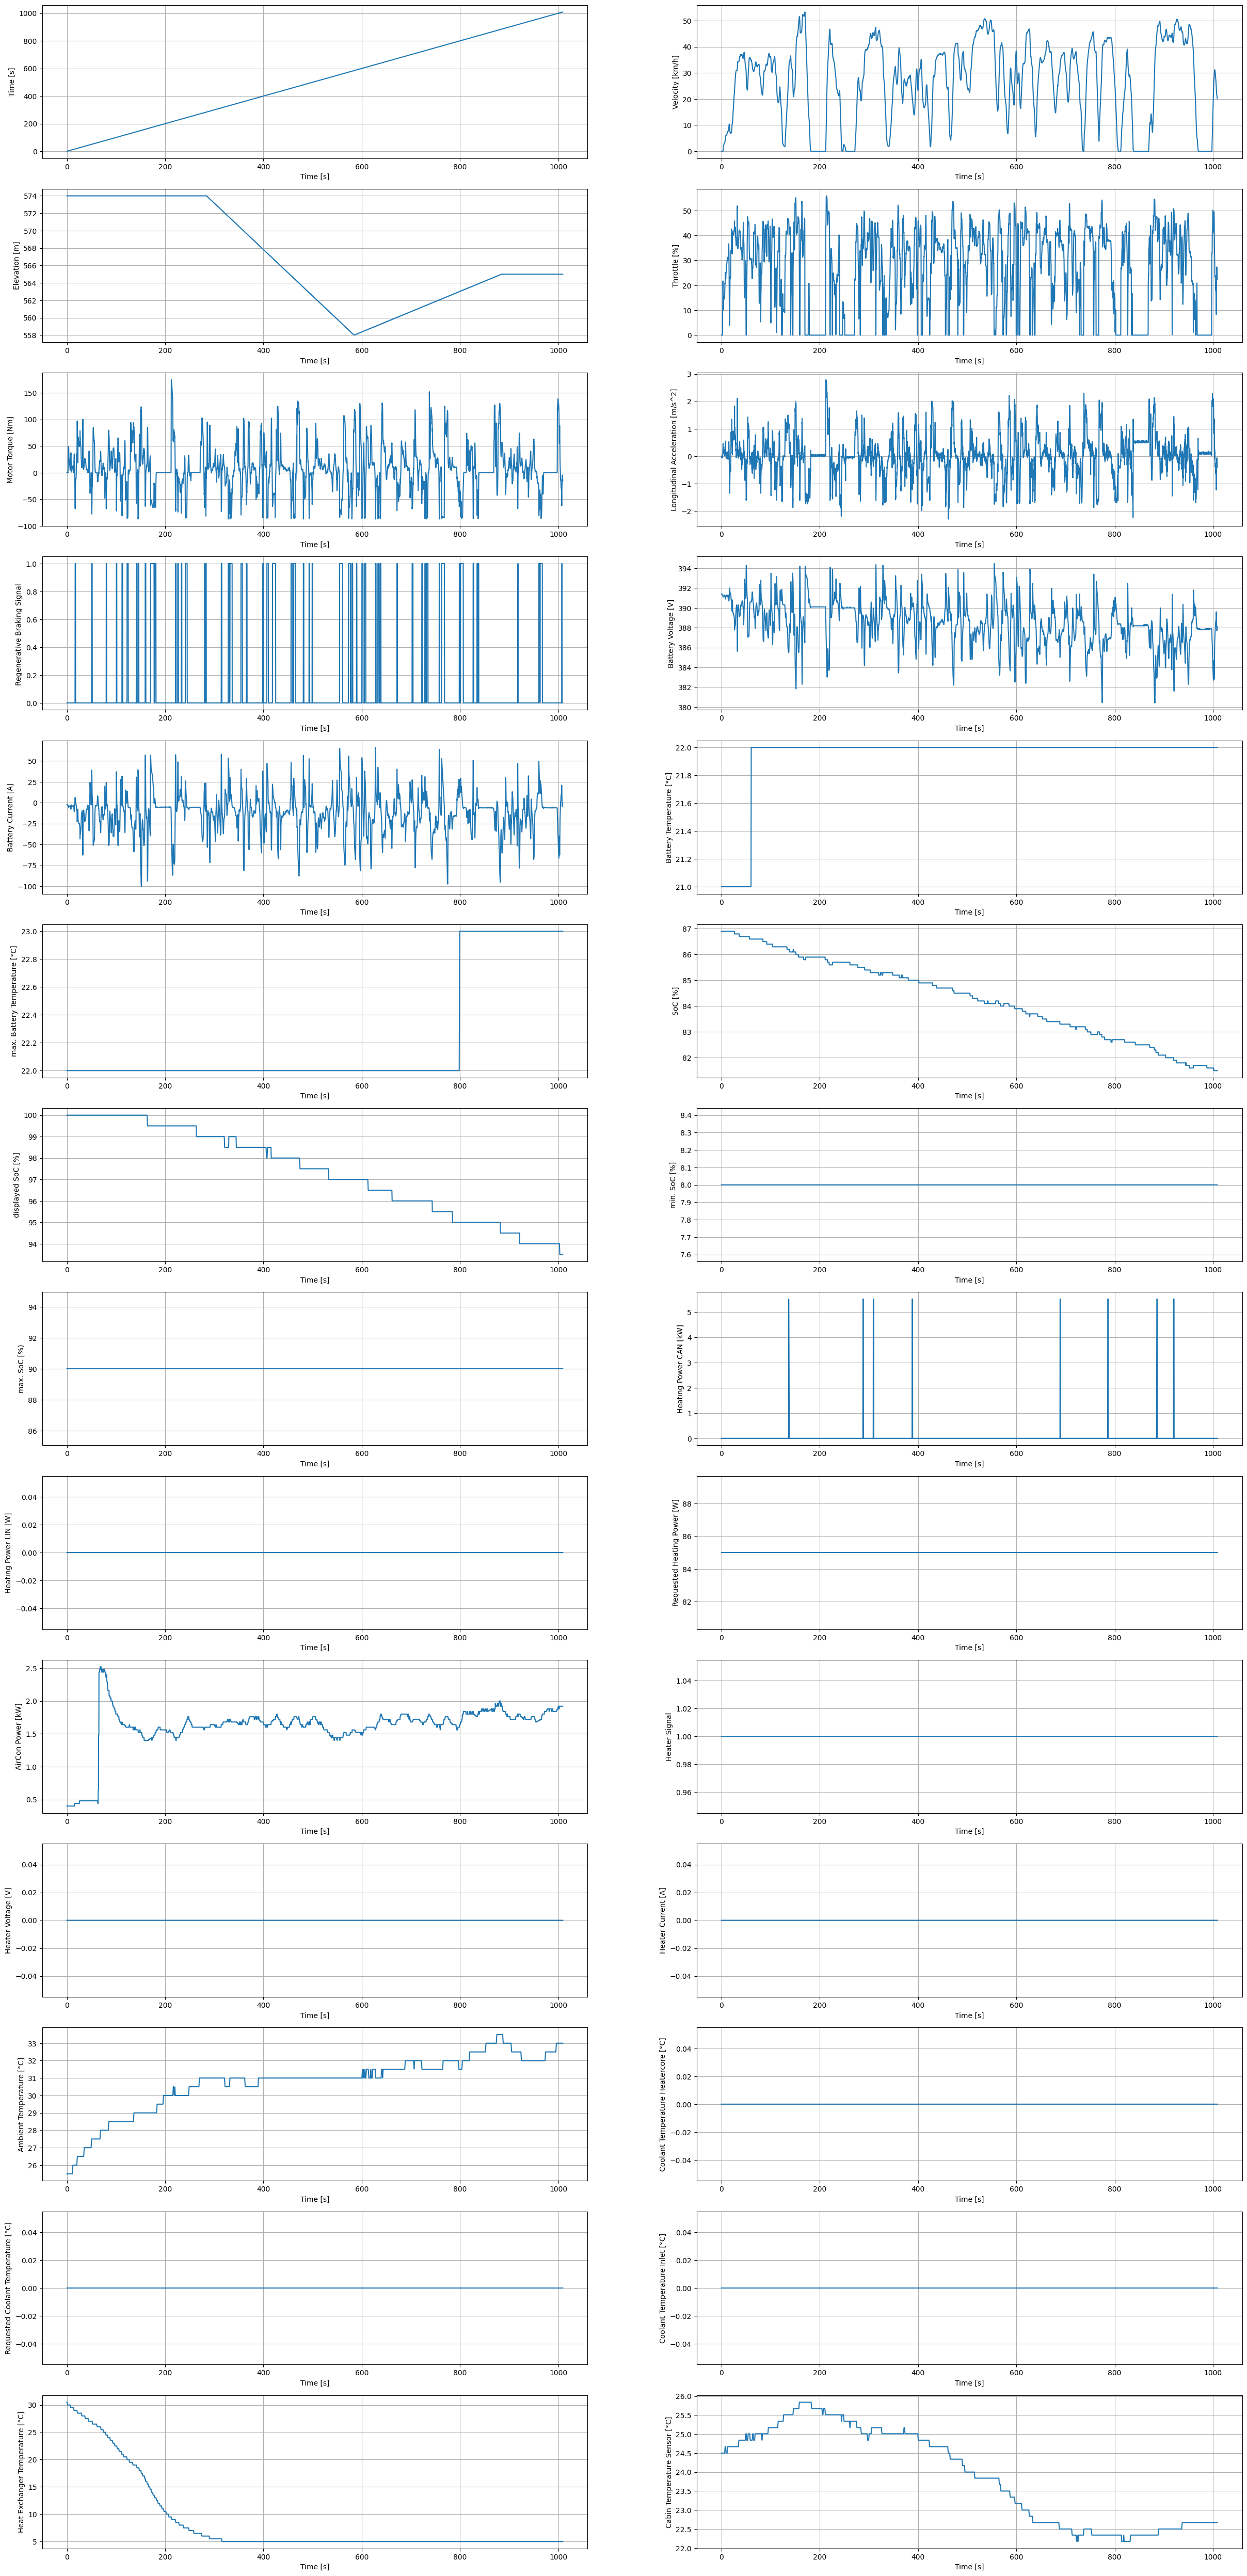

In [40]:
plot_df_subplots(df, nrows=14, ncols=2, figsize=(30,64))

In [61]:
# finding columns which don't vary accross the run - 
# 'min. SoC [%]', 'max. SoC [%)', 'Heating Power CAN [kW]', 'Heating Power LIN [W]', 'Requested Heating Power [W]',
# 'Heater Signal', 'Heater Voltage [V]', 'Heater Current [A]', 'Coolant Temperature Heatercore [°C]',
# 'Requested Coolant Temperature [°C]', 'Coolant Temperature Inlet [°C]',
df.columns

Index(['Time [s]', 'Velocity [km/h]', 'Elevation [m]', 'Throttle [%]',
       'Motor Torque [Nm]', 'Longitudinal Acceleration [m/s^2]',
       'Regenerative Braking Signal ', 'Battery Voltage [V]',
       'Battery Current [A]', 'Battery Temperature [°C]',
       'max. Battery Temperature [°C]', 'SoC [%]', 'displayed SoC [%]',
       'min. SoC [%]', 'max. SoC [%)', 'Heating Power CAN [kW]',
       'Heating Power LIN [W]', 'Requested Heating Power [W]',
       'AirCon Power [kW]', 'Heater Signal', 'Heater Voltage [V]',
       'Heater Current [A]', 'Ambient Temperature [°C]',
       'Coolant Temperature Heatercore [°C]',
       'Requested Coolant Temperature [°C]', 'Coolant Temperature Inlet [°C]',
       'Heat Exchanger Temperature [°C]', 'Cabin Temperature Sensor [°C]'],
      dtype='object')

<Axes: >

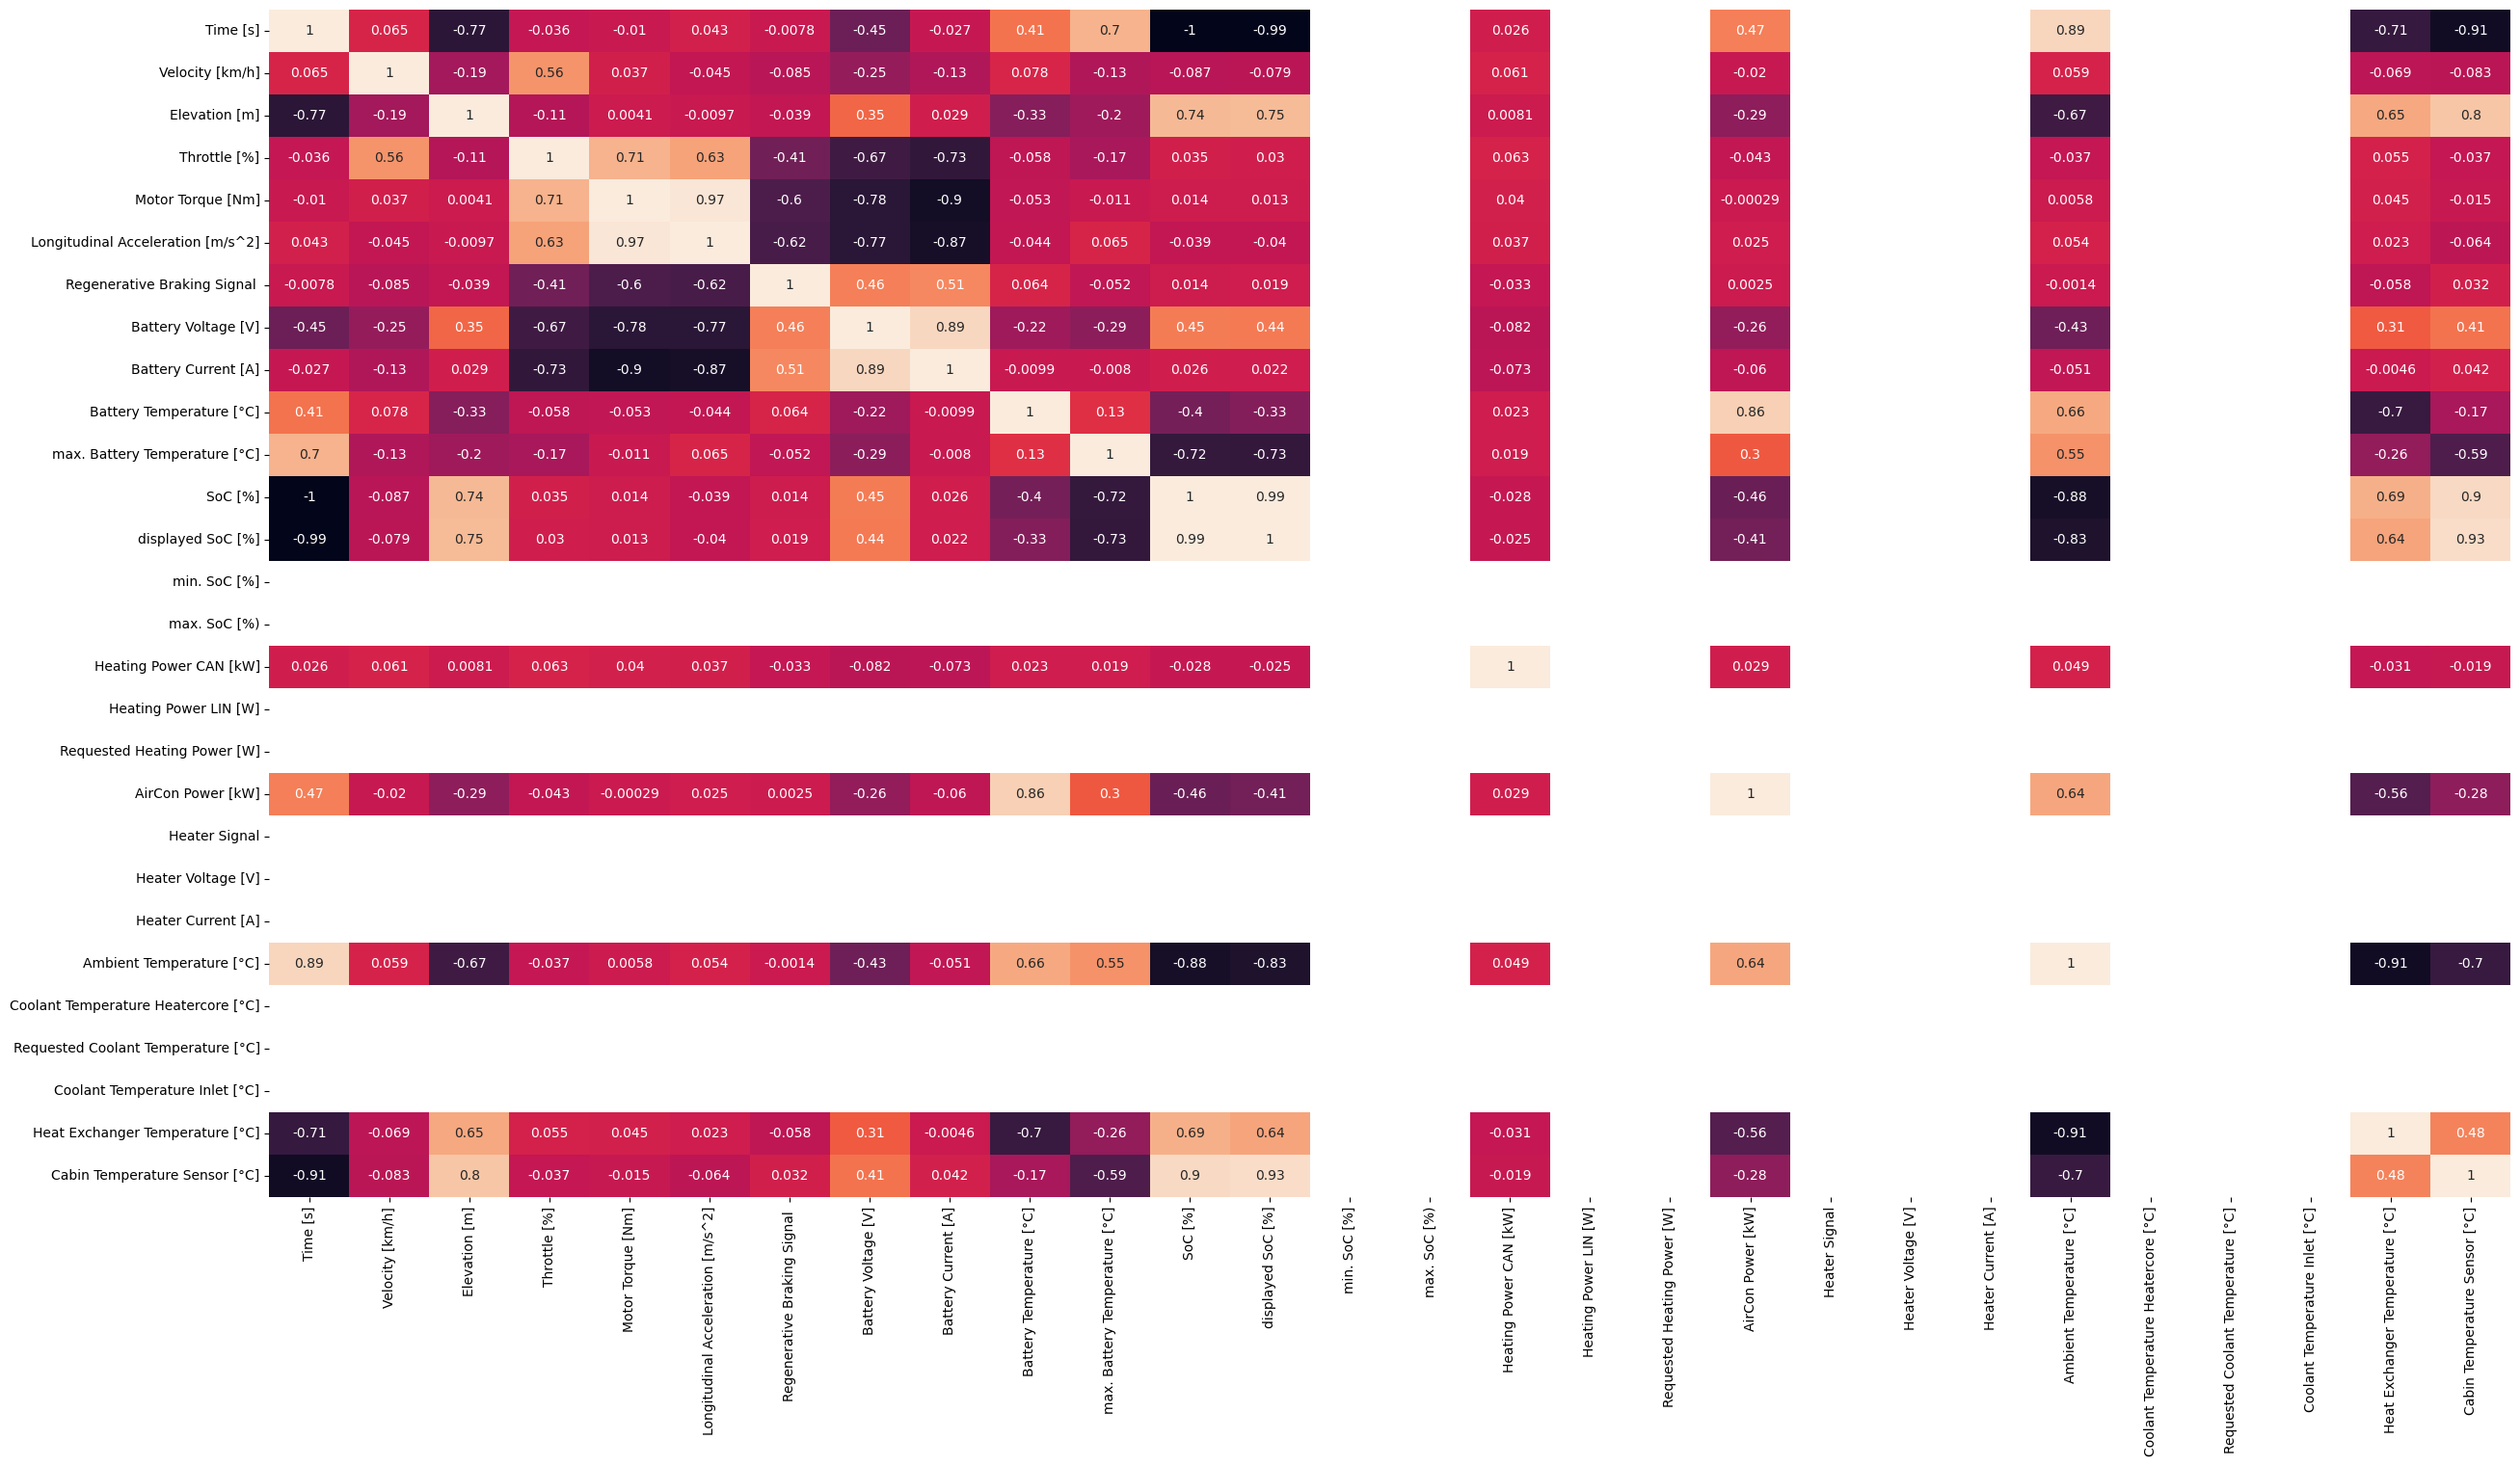

In [35]:
plt.figure(figsize=(30,16))
sns.heatmap(df.corr(), annot=True, cbar=False)

# Modeling

### Train Test split

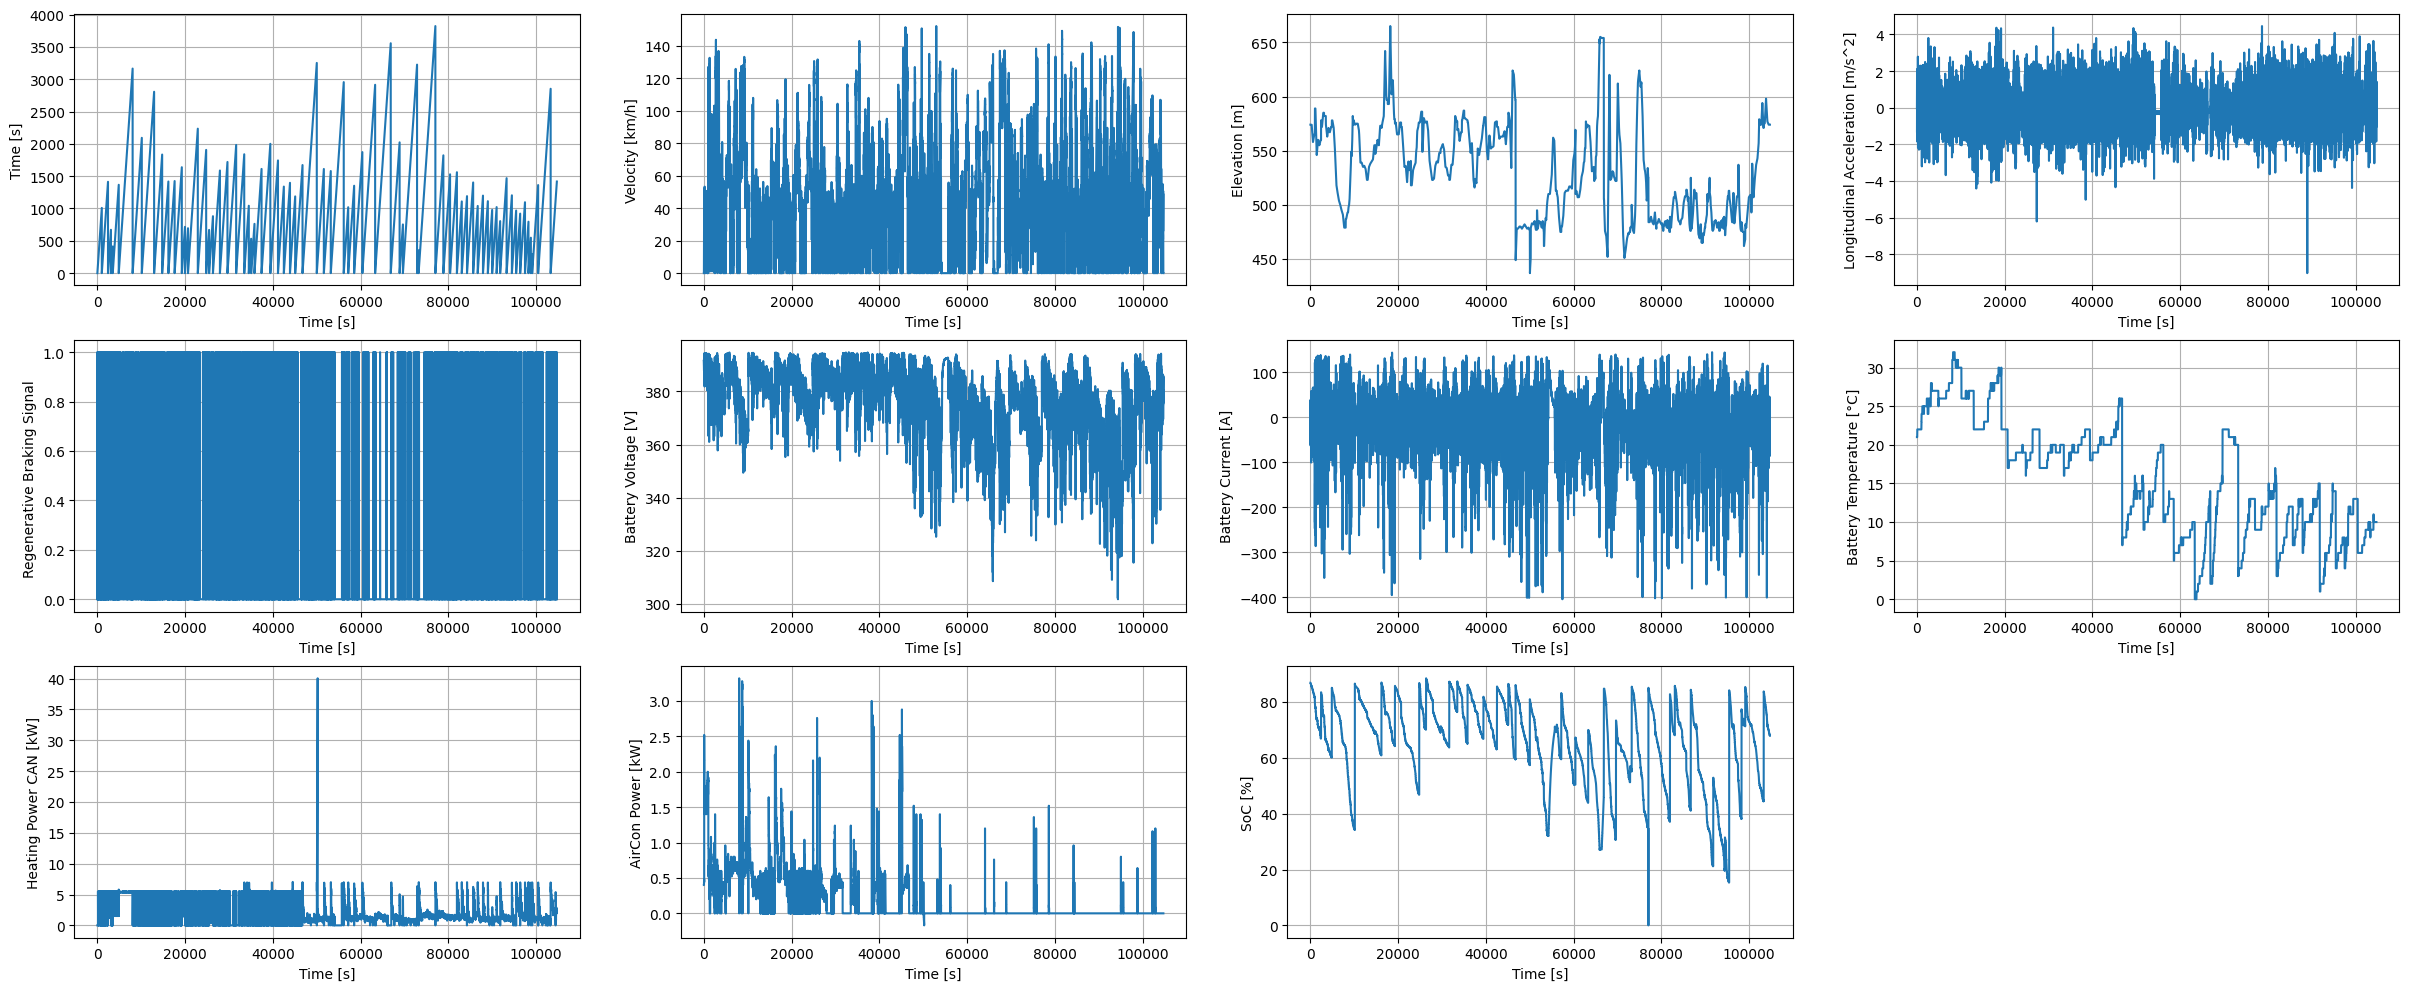

In [44]:
# choosing which variables we focus on
df_x_y = All_trips[['Time [s]','Velocity [km/h]','Elevation [m]','Longitudinal Acceleration [m/s^2]','Regenerative Braking Signal ','Battery Voltage [V]',
                    'Battery Current [A]','Battery Temperature [°C]','Heating Power CAN [kW]','AirCon Power [kW]','SoC [%]']].dropna()

plot_dataframe_subplots(df_x_y, nrows=3, ncols=4, figsize=(30, 12))

In [45]:
X = df_x_y.drop(['Time [s]','SoC [%]'], axis=1)
y = df_x_y[['SoC [%]']]
splitter = int(len(X)*0.7)
X_train = X.values[:splitter]
X_test = X.values[splitter:]
y_train = y.values[:splitter]
y_test = y.values[splitter:]
# Check the dataset sizes
X_train.shape, y_train.shape, X_test.shape, y_test.shape[0]

((733299, 9), (733299, 1), (314272, 9), 314272)

In [54]:
def regression_metrics(y_test, y_pred):
    # calculate errors
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)
    # report error
    print(f'Mean Squared Error: {mse}')
    print(f'Root Mean Square Error: {rmse}')
    print(f'Mean Absolute Error: {mae}')

In [57]:
def plot_comparison(y_test, y_pred, xlabel, ylabel, dark_mode=False, figsize=(30, 8)):
    if dark_mode:
        plt.figure(figsize=figsize, facecolor='black')
        ax = plt.axes()
        ax.set_facecolor("black")
        ax.spines['bottom'].set_color('gray')
        ax.spines['top'].set_color('gray')
        ax.spines['right'].set_color('gray')
        ax.spines['left'].set_color('gray')
        ax.tick_params(colors='white', which='both')
        plt.plot(y_pred, color="yellow")
        plt.plot(y_test, color="white")
        plt.legend(['Predicted', 'Measured'])
        plt.xlabel(xlabel, color='white')
        plt.ylabel(ylabel, color='white')
    else:
        plt.figure(figsize=figsize)
        plt.plot(y_pred)
        plt.plot(y_test)        
        plt.legend(['Predicted', 'Measured'])
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
    plt.grid(True)

Linear Regression:
Mean Squared Error: 17.715351075464937
Root Mean Square Error: 4.208960807071614
Mean Absolute Error: 3.1213236220278775


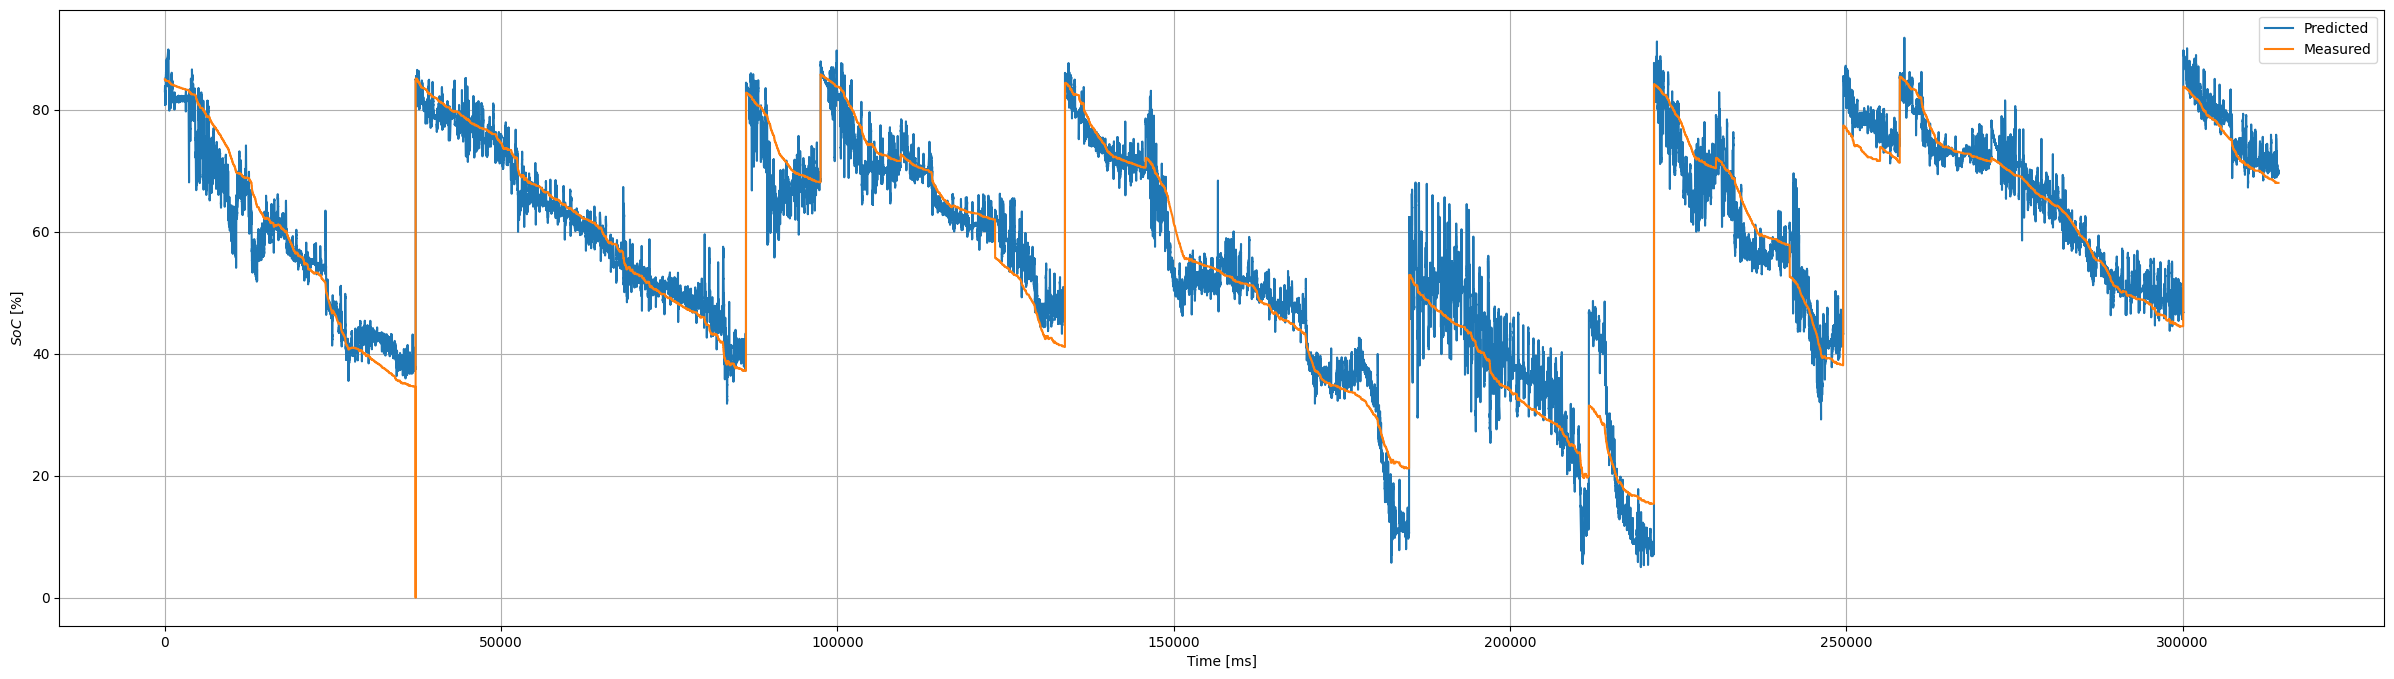

In [58]:
# 1. Create a model
regressor = LinearRegression()
# 2. Fit the model
regressor.fit(X_train, y_train)
# 3. Make predicitons with the model
y_pred_lr = regressor.predict(X_test)
# 4. Evaluate and visualize
print('Linear Regression:')
regression_metrics(y_test, y_pred_lr)
plot_comparison(y_test=y_test, y_pred=y_pred_lr, xlabel="Time [ms]", ylabel="$SoC$ [%]")

9821/9821 [==============================] - 5s 490us/step
Neural Network:
Mean Squared Error: 22.37063145702708
Root Mean Square Error: 4.729760190223927
Mean Absolute Error: 3.5718435176562773


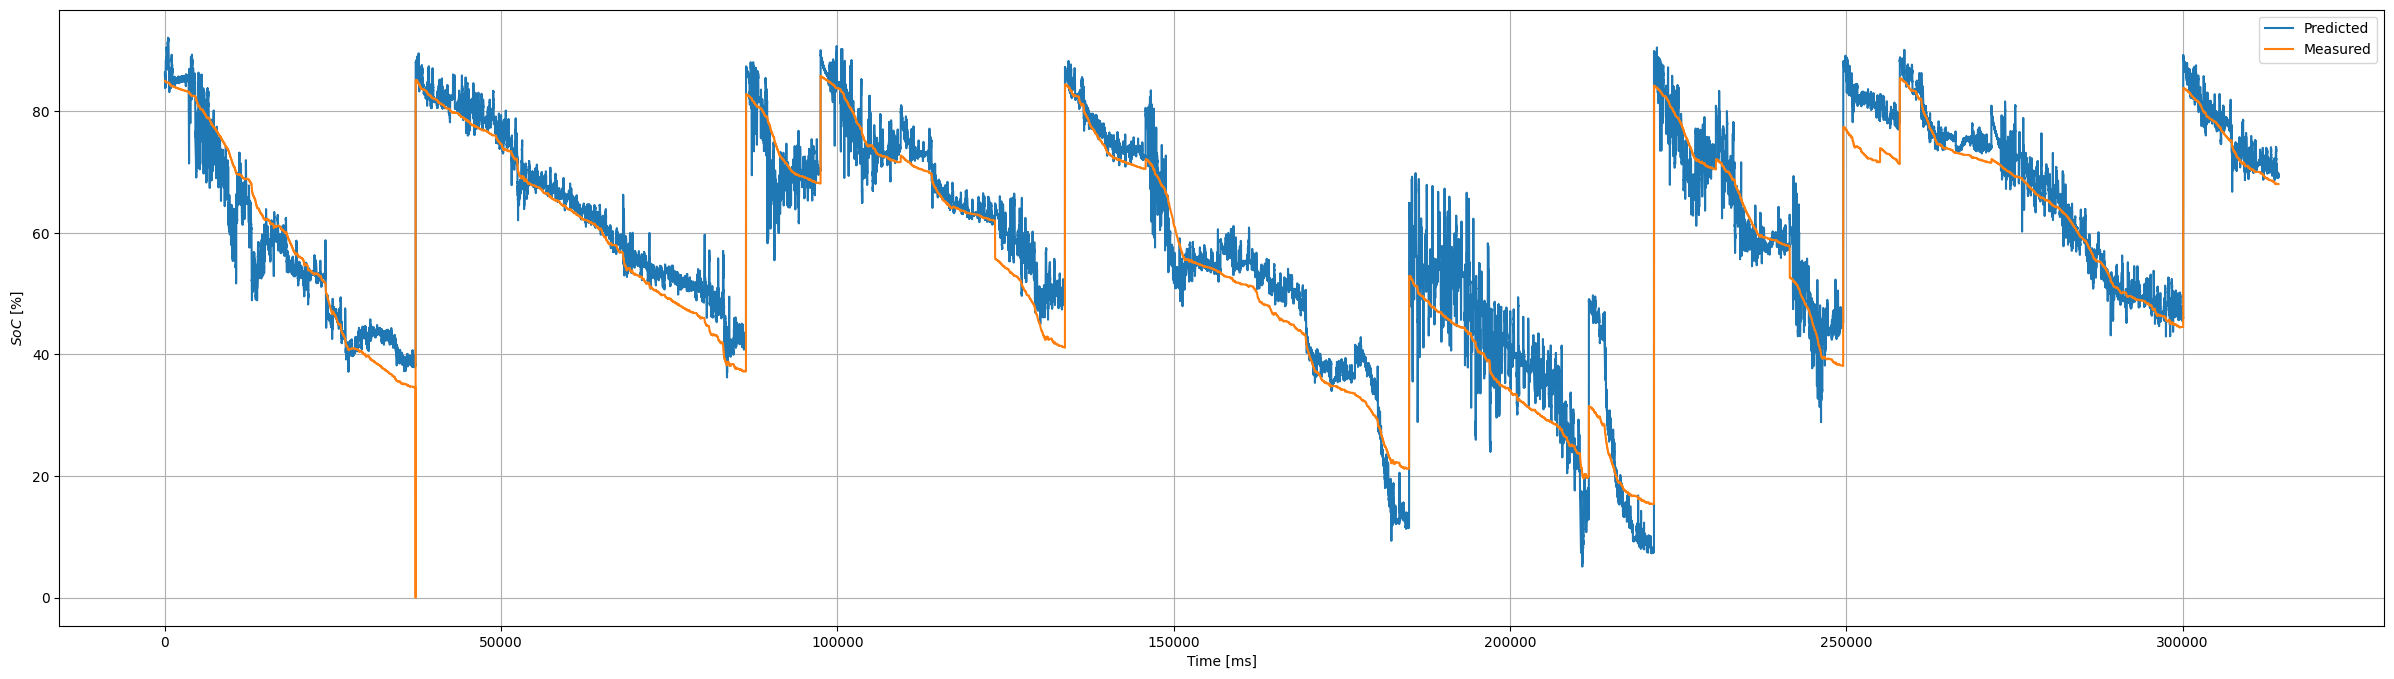

In [60]:
# 1. Create a model
regressor = Sequential([
    layers.Dense(10),
    layers.Dense(100),
    layers.Dense(100),
    layers.Dense(1),
])
# 2. Compile a model
regressor.compile(optimizer=optimizers.Adam(learning_rate=0.0001),
                  loss=losses.mae,
                  metrics=["mae"])
# 3. Fit a model
regressor.fit(X_train, y_train, epochs=20, verbose=0)
# 4. Validate the model
y_pred_nn = regressor.predict(X_test)
# 5. Evaluate and visualize
print('Neural Network:')
regression_matrics(y_test, y_pred_nn)
plot_comparison(y_test=y_test, y_pred=y_pred_nn, xlabel="Time [ms]", ylabel="$SoC$ [%]", dark_mode=False)